### This script is used for compare <mark>furans</mark> from different primary emission sources.
**Sources**: Wildland fires, residential wood burning, building emissions, ;

**Implication**: Where are furans from?

In [2]:
# import modules
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Provide raw data here
# TBD: make it a csv file later
# the data here is from IDL data processing in GFED4 and NEI emission inventory
# building emission is from personal correspondence
# further help is needed to build up a regional inven tory

# open fire
Furan_of          = [2.42513, 23.1557, 8.64323, 0.259203]
Methylfuran_of    = [1.50929, 15.1136, 5.55298, 0.162009]
Dimethylfuran_of  = [0.514758, 8.69192, 3.01514, 0.0678845]
Furfural_of       = [3.55672, 36.8459, 12.8368, 0.361952]
Methylfurfural_of = [1.70844, 17.4722, 6.10017, 0.173157]

# RWC
Furan_rwc         = [2.5456502, 0.41480984, 1.9466954, 6.3720457]
Methylfuran_rwc   = [2.5484421, 0.41526478, 1.9488304, 6.3790343]
Dimethylfuran_rwc = [0.68075889, 0.11092863, 0.52058614, 1.7040153]
Furfural_rwc      = [4.9456740, 0.80589008, 3.7820282, 12.379572] 
Methylfurfural_rwc= [5.6621995, 0.92264683, 4.3299656, 14.173116]

# on road
Furan_on         = [0.64027490, 0.74334287, 0.64201497, 0.64315470]
Methylfuran_on   = [1.2314076, 1.4296329, 1.2347542, 1.2369461]
Dimethylfuran_on = [1.0264222, 1.1916501, 1.0292117, 1.0310388]
Furfural_on      = [0.62496092, 0.72556373, 0.62665938, 0.62777184]
Methylfurfural_on= [1.2928675, 1.5009863, 1.2928675, 1.2928675]

# building
Furan_bd          = [0]*len(Furan_of)
Methylfuran_bd    = [0]*len(Furan_of)
Dimethylfuran_bd  = [0]*len(Furan_of)
Furfural_bd       = [0.06*332.0*0.25, 0.06*332.0*0.25, 0.06*332.0*0.25, 0.06*332.0*0.25] # The 0.25 ratio may not be right due to the temperature-dependency
Methylfurfural_bd = [0]*len(Furan_of)

x_name = ['Spring (MAM)', 'Summer (JJA)', 'Autumn (SON)', 'Winter (DJF)']


### Total Furans emission (seasonal pattern), which is stack bar chart

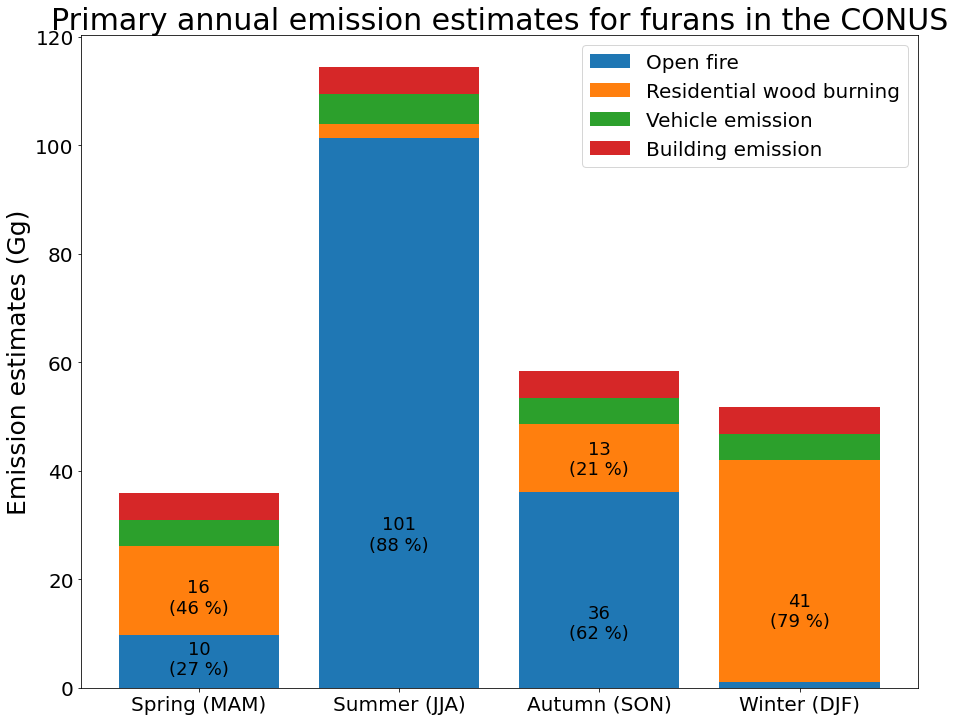

In [4]:
# initialize data of lists.
data = {'Open fire': np.array(Furan_of) + np.array(Methylfuran_of) + np.array(Dimethylfuran_of) + np.array(Furfural_of) + np.array(Methylfurfural_of),
        'Residential wood burning': np.array(Furan_rwc) + np.array(Methylfuran_rwc) + np.array(Dimethylfuran_rwc) + np.array(Furfural_rwc) + np.array(Methylfurfural_rwc) ,
        'Vehicle emission': np.array(Furan_on) + np.array(Methylfuran_on) + np.array(Dimethylfuran_on) + np.array(Furfural_on) + np.array(Methylfurfural_on), 
        'Building emission': np.array(Furfural_bd)}
df = pd.DataFrame(data, index = x_name)

# Setup figure
# mapping colors
src2color = {"Open fire": "C0",
             "Residential wood burning": "C1",
             "Vehicle emission": "C2",
             "Building emission": "C3"}


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
# Add bars
ax.bar(df.index, df["Open fire"], label="Open fire", color = src2color["Open fire"])
ax.bar(df.index, df["Residential wood burning"], bottom=df["Open fire"], label="Residential wood burning", color = src2color["Residential wood burning"])
ax.bar(df.index, df["Vehicle emission"], bottom=df["Open fire"] + df["Residential wood burning"], label="Vehicle emission", color = src2color["Vehicle emission"])
ax.bar(df.index, df["Building emission"], bottom=df["Open fire"] + df["Residential wood burning"] + df["Vehicle emission"], label="Building emission", color = src2color["Building emission"])
# Add text for Gg and percentage
for ind in df.index: # running through each season
    start = 0
    for col in df.columns:
        value, pct = df.loc[ind, col], round(100 * df.loc[ind, col] / df.loc[ind, :].sum(), 1)
        #ytext = f'{np.round(value,2)}\n({pct} %)'
        ytext = '{:.0f}\n({:.0f} %)'.format(value, pct)
        
        # only show the text when the contribution is more than 10%
        if pct > 15:
            ax.text(x = ind, y = start+value/4, 
                    s = ytext,
                    fontsize = 18,
                    ha='center',
                    color='black')
        start += value
        
# Add the x axis information 
plt.xticks(df.index, df.index)

# set labels
plt.ylabel("Emission estimates (Gg)", size=25)

# size of xtick and y tick
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# legend size
ax.legend(fontsize=20)
#plt.tight_layout()

# title
plt.title("Primary annual emission estimates for furans in the CONUS", size=30)

plt.show()

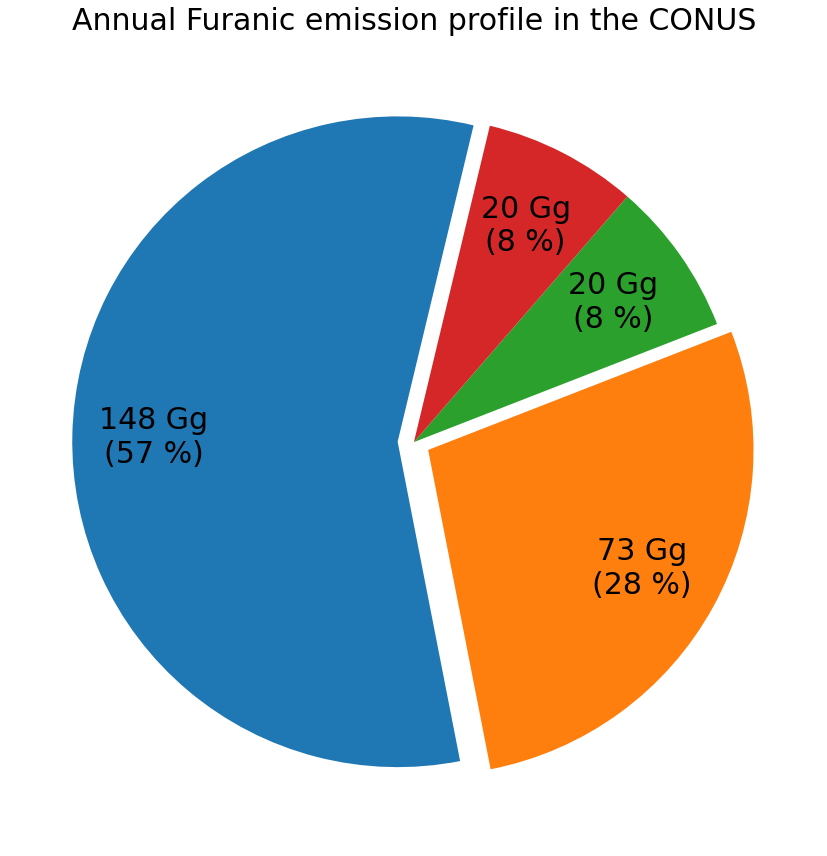

In [5]:
# initialize data of lists.
Emissions_src = [sum(np.array(Furan_of) + np.array(Methylfuran_of) + np.array(Dimethylfuran_of) + np.array(Furfural_of) + np.array(Methylfurfural_of)), 
                 sum(np.array(Furan_rwc) + np.array(Methylfuran_rwc) + np.array(Dimethylfuran_rwc) + np.array(Furfural_rwc) + np.array(Methylfurfural_rwc)),
                 sum(np.array(Furan_on) + np.array(Methylfuran_on) + np.array(Dimethylfuran_on) + np.array(Furfural_on) + np.array(Methylfurfural_on)),
                 sum(np.array(Furfural_bd))]
# mapping colors
src2color = {"Open fire": "C0",
             "Residential wood burning": "C1",
             "Vehicle emission": "C2",
             "Building emission": "C3"}

Names_src = ['Open fire', 'Residential wood burning', 'Vehicle emission', 'Building emission']
df = pd.DataFrame({'Primary source': Names_src,
                  'Emission estiamte': Emissions_src,
                  'colors': src2color.values()}) 
df = df.sort_values(by=['Emission estiamte'],ascending=False)

# plotting
# set figure size



plt.figure(figsize=(15,12))

# division setting
# non-zero value represents the distance of that slice from the center.
explode_val = [0.05, 0.05, 0, 0] 

# fmt settings
#fmt_pct = '%1.1f%%'
fmt_pct_size = 30
total =  df['Emission estiamte'].sum()
def fmt_pct(pct):
    value = total*pct/100
    #return f'{np.round(value,2)} Gg\n({np.round(pct,1)} %)'
    return '{:.0f} Gg\n({:.0f} %)'.format(value, pct)


# assuming df is what we compiled above
_, _, autotexts  = plt.pie(df['Emission estiamte'],
                  autopct = fmt_pct,# set up percentage values
                  textprops={'fontsize': fmt_pct_size},
                  #shadow = True,
                  explode = explode_val, #  specifies the fraction of the radius with which to offset each wedge
                  colors = df['colors'], # color list
                  startangle =76.5, 
                  pctdistance=0.75,

                  #labels = df['Furanic specie']
                 )
for autotext in autotexts:
    autotext.set_color('black')
    
# add legend
#plt.legend(df['Primary source'], 
#           loc='upper center', 
#          bbox_to_anchor=(0.54,0.88),
#           prop={'size':18 }) # 'best', 'upper right'

#plt.legend(pie[0],df['Furanic specie'], bbox_to_anchor=(0.5,0), loc='lower center', fontsize=20, 
#           bbox_transform=plt.gcf().transFigure)

# title
plt.title("Annual Furanic emission profile in the CONUS", size=30)

# make it tight
plt.tight_layout()

plt.show()


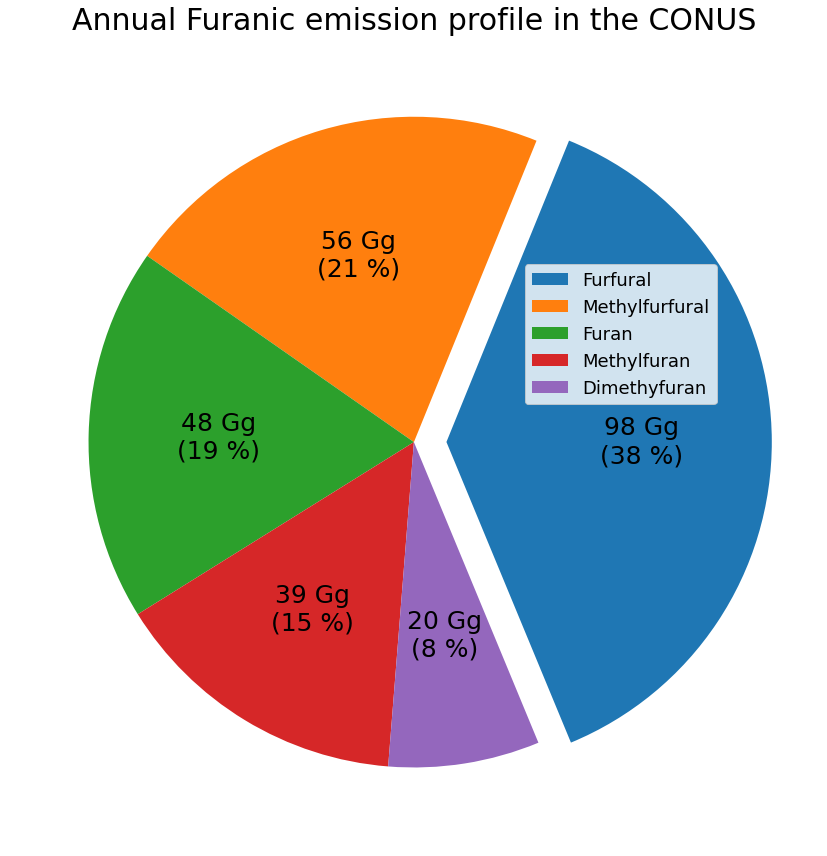

In [6]:
# data processing
Furan_total =  np.array(Furan_of) + np.array(Furan_rwc) + np.array(Furan_on)
Methylfuran_total =  np.array(Methylfuran_of) + np.array(Methylfuran_rwc) + np.array(Methylfuran_on)
Dimethylfuran_total =  np.array(Dimethylfuran_of) + np.array(Dimethylfuran_rwc) + np.array(Dimethylfuran_on)
Furfural_total =  np.array(Furfural_of) + np.array(Furfural_rwc) + np.array(Furfural_on) + np.array(Furfural_bd)
Methylfurfural_total =  np.array(Methylfurfural_of) + np.array(Methylfurfural_rwc) + np.array(Methylfurfural_on)

# initialize data of lists.
data = {'Furanic specie': ['Furan', 'Methylfuran', 'Dimethyfuran', 'Furfural', 'Methylfurfural'],
        'Emission': [Furan_total.sum(), Methylfuran_total.sum(), Dimethylfuran_total.sum(), Furfural_total.sum(), Methylfurfural_total.sum()]}
df = pd.DataFrame(data)
df = df.sort_values(by=['Emission'],ascending=False)

# set figure size
plt.figure(figsize=(15,12))

# division setting
# non-zero value represents the distance of that slice from the center.
explode_val = [0.1, 0, 0, 0, 0] 

# fmt settings
#fmt_pct = '%1.1f%%'
fmt_pct_size = 25
total =  df['Emission'].sum()
def fmt_pct(pct):
    value = total*pct/100
    #return f'{np.round(value,2)} Gg\n({np.round(pct,1)} %)'
    return '{:.0f} Gg\n({:.0f} %)'.format(value, pct)

# assuming df is what we compiled above
pie = plt.pie(df['Emission'],
              autopct = fmt_pct,# set up percentage values
              textprops={'fontsize': fmt_pct_size},
              #shadow = True,
              explode = explode_val, #  specifies the fraction of the radius with which to offset each wedge
              #colors = colors_list, # color list
              startangle = 292.5, 
              #labels = df['Furanic specie']
             )

# add legend
plt.legend(df['Furanic specie'], 
           #loc='best', 
           bbox_to_anchor=(0.625,0.73),
           prop={'size':18 }) # 'best', 'upper right'

#plt.legend(pie[0],df['Furanic specie'], bbox_to_anchor=(0.5,0), loc='lower center', fontsize=20, 
#           bbox_transform=plt.gcf().transFigure)

# title
plt.title("Annual Furanic emission profile in the CONUS", size=30)

# make it tight
plt.tight_layout()

plt.show()


#### bar chart to show the idea, this might be better than the pie chart

In [23]:
df

,Open fire,Residential wood burning,Vehicle emission,Building emission
Furfural,53.601372,21.913164,2.604956,21.913164
Furan,34.483263,11.279201,2.668787,0.000000
Methylfurfural,25.453967,25.087928,5.379589,0.000000
Methylfuran,22.337879,11.291572,5.132741,0.000000
Dimethylfuran,12.289703,3.016289,4.278323,0.000000


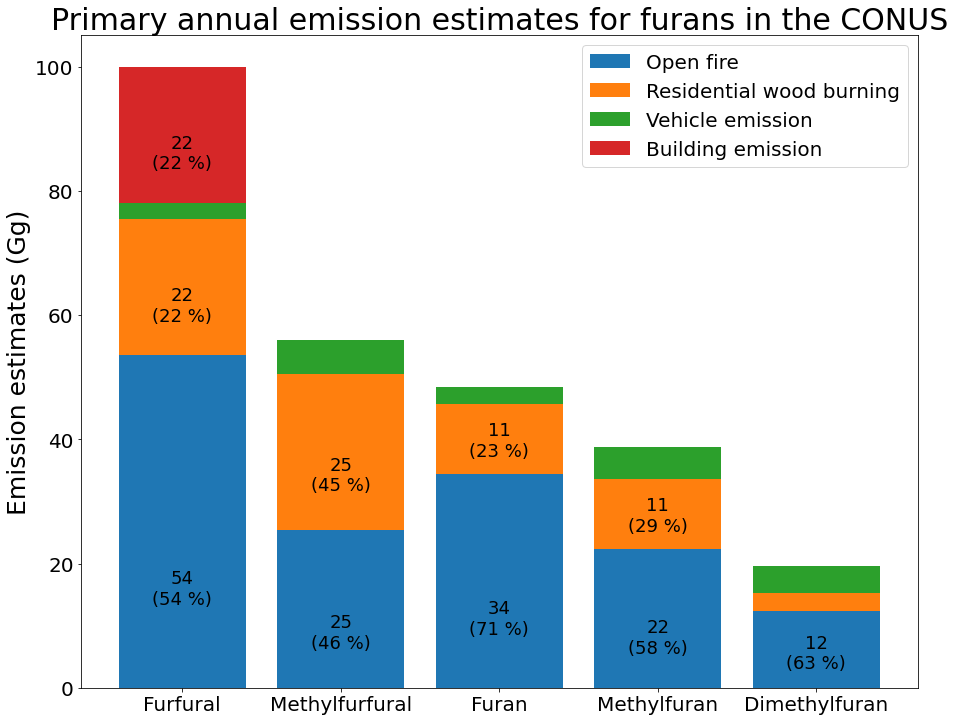

In [27]:
# initialize data of lists.
emis_of = [sum(Furan_of), sum(Methylfuran_of), sum(Dimethylfuran_of), sum(Furfural_of), sum(Methylfurfural_of)]
emis_rwb = [sum(Furan_rwc), sum(Methylfuran_rwc), sum(Dimethylfuran_rwc), sum(Furfural_rwc), sum(Methylfurfural_rwc)]
emis_vehicle = [sum(Furan_on), sum(Methylfuran_on), sum(Dimethylfuran_on), sum(Furfural_on), sum(Methylfurfural_on)]
emis_building= [0, 0, 0, sum(Furfural_rwc), 0]

data = {'Open fire': emis_of,
        'Residential wood burning': emis_rwb,
        'Vehicle emission': emis_vehicle, 
        'Building emission': emis_building,
        'Total': np.array(emis_of) + np.array(emis_rwb) + np.array(emis_vehicle) + np.array(emis_building)}

x_name = ['Furan', 'Methylfuran', 'Dimethylfuran', 'Furfural', 'Methylfurfural']

df = pd.DataFrame(data, index = x_name)

# sort, rank and drop
df = df.sort_values(by=['Total'],ascending=False)
df = df.drop(['Total'], axis = 1)

# Setup figure
# mapping colors
src2color = {"Open fire": "C0",
             "Residential wood burning": "C1",
             "Vehicle emission": "C2",
             "Building emission": "C3"}

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
# Add bars
ax.bar(df.index, df["Open fire"], label="Open fire", color = src2color["Open fire"])
ax.bar(df.index, df["Residential wood burning"], bottom=df["Open fire"], label="Residential wood burning", color = src2color["Residential wood burning"])
ax.bar(df.index, df["Vehicle emission"], bottom=df["Open fire"] + df["Residential wood burning"], label="Vehicle emission", color = src2color["Vehicle emission"])
ax.bar(df.index, df["Building emission"], bottom=df["Open fire"] + df["Residential wood burning"] + df["Vehicle emission"], label="Building emission", color = src2color["Building emission"])

# Add text for Gg and percentage
for ind in df.index: # running through each season
    start = 0
    for col in df.columns:
        value, pct = df.loc[ind, col], round(100 * df.loc[ind, col] / df.loc[ind, :].sum(), 1)
        #ytext = f'{np.round(value,2)}\n({pct} %)'
        ytext = '{:.0f}\n({:.0f} %)'.format(value, pct)
        
        # only show the text when the contribution is more than 10%
        if (pct > 15 and ind != 'Dimethylfuran') or (pct>25 and ind == 'Dimethylfuran'):
            ax.text(x = ind, y = start+value/4, 
                    s = ytext,
                    fontsize = 18,
                    ha='center',
                    color='black')
        start += value
        
# Add the x axis information 
plt.xticks(df.index, df.index)

# set labels
plt.ylabel("Emission estimates (Gg)", size=25)

# size of xtick and y tick
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# legend size
ax.legend(fontsize=20)
#plt.tight_layout()

# title
plt.title("Primary annual emission estimates for furans in the CONUS", size=30)

plt.show()

In [15]:
df.index

Index(['Furan', 'Methylfuran', 'Dimethylfuran', 'Furfural', 'Methylfurfural'], dtype='object')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Furfural'),
  Text(1, 0, 'Methylfurfural'),
  Text(2, 0, 'Furan'),
  Text(3, 0, 'Methylfuran'),
  Text(4, 0, 'Dimethyfuran')])

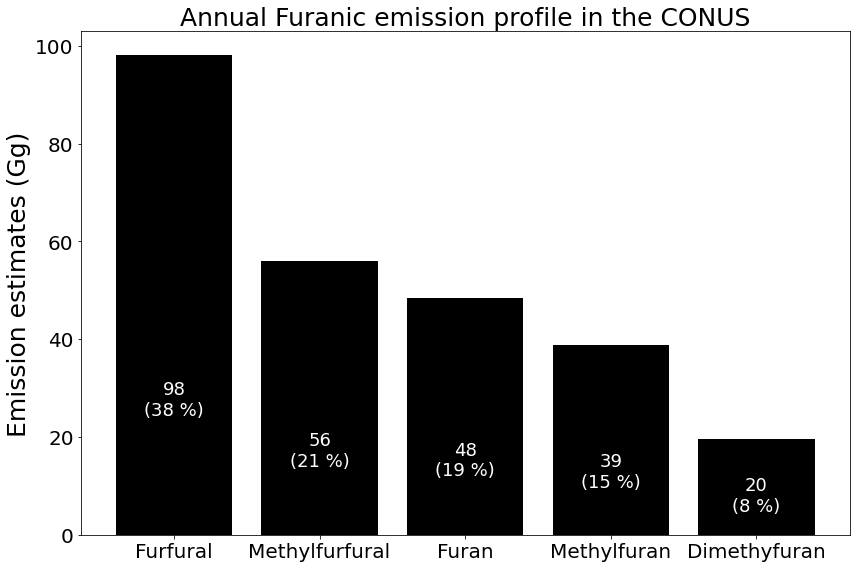

In [6]:
# data processing
Furan_total =  np.array(Furan_of) + np.array(Furan_rwc) + np.array(Furan_on)
Methylfuran_total =  np.array(Methylfuran_of) + np.array(Methylfuran_rwc) + np.array(Methylfuran_on)
Dimethylfuran_total =  np.array(Dimethylfuran_of) + np.array(Dimethylfuran_rwc) + np.array(Dimethylfuran_on)
Furfural_total =  np.array(Furfural_of) + np.array(Furfural_rwc) + np.array(Furfural_on) + np.array(Furfural_bd)
Methylfurfural_total =  np.array(Methylfurfural_of) + np.array(Methylfurfural_rwc) + np.array(Methylfurfural_on)

# initialize data of lists.
data = {'Furanic specie': ['Furan', 'Methylfuran', 'Dimethyfuran', 'Furfural', 'Methylfurfural'],
        'Emission': [Furan_total.sum(), Methylfuran_total.sum(), Dimethylfuran_total.sum(), Furfural_total.sum(), Methylfurfural_total.sum()]}
df = pd.DataFrame(data)
df = df.sort_values(by=['Emission'],ascending=False)

# set figure size
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
 
# make barplot and sort bars
df = df.sort_values(by=['Emission'],ascending=False)

ax.bar(df['Furanic specie'], df['Emission'], color='black')

# Add text for Gg and percentage
for ind, txt_xloc in zip(df.index, range(len(df.index))): # running through each season
    value, pct = df['Emission'].loc[ind], round(100 * df['Emission'].loc[ind] / df['Emission'].sum(), 1)
    #ytext = f'{np.round(value,2)}\n({pct} %)'
    ytext = '{:.0f}\n({:.0f} %)'.format(value, pct)

    ax.text(x = txt_xloc, y = value/4, 
            s = ytext,
            fontsize = 18,
            ha='center',
            color='white')

# set labels
plt.ylabel("Emission estimates (Gg)", size=25)

# size of xtick and y tick
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# title
plt.title("Annual Furanic emission profile in the CONUS", size=25)
plt.tight_layout()

# hide the labal
#ax.set(xlabel=None)

# rotate the x axis
plt.xticks(rotation=0)

### Furfural and other individual Furans

#### Furfural

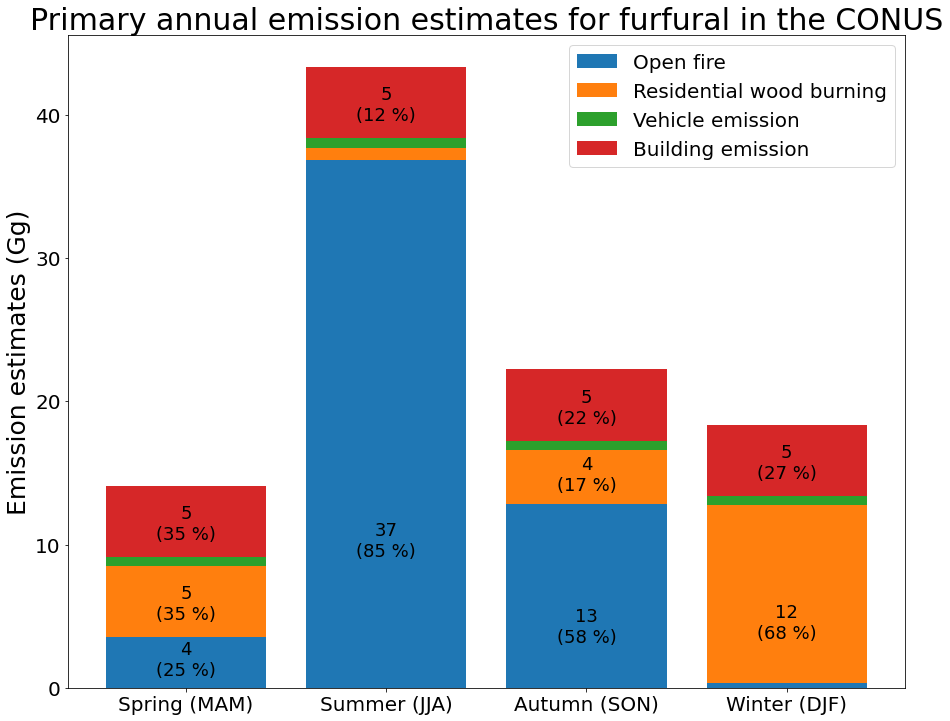

In [7]:
# initialize data of lists.
data = {'Open fire': Furfural_of,
        'Residential wood burning': Furfural_rwc,
        'Vehicle emission': Furfural_on, 
        'Building emission': Furfural_bd}
df = pd.DataFrame(data, index = x_name)


# mapping colors
src2color = {"Open fire": "C0",
             "Residential wood burning": "C1",
             "Vehicle emission": "C2",
             "Building emission": "C3"}

# Setup figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))

# Add bars
ax.bar(df.index, df["Open fire"], label="Open fire", color = src2color["Open fire"])
ax.bar(df.index, df["Residential wood burning"], bottom=df["Open fire"], label="Residential wood burning", color = src2color["Residential wood burning"])
ax.bar(df.index, df["Vehicle emission"], bottom=df["Open fire"] + df["Residential wood burning"], label="Vehicle emission", color = src2color["Vehicle emission"])
ax.bar(df.index, df["Building emission"], bottom=df["Open fire"] + df["Residential wood burning"] + df["Vehicle emission"], label="Building emission", color = src2color["Building emission"])

# Add text for Gg and percentage
for ind in df.index: # running through each season
    start = 0
    for col in df.columns:
        value, pct = df.loc[ind, col], round(100 * df.loc[ind, col] / df.loc[ind, :].sum(), 1)
        #ytext = f'{np.round(value,2)}\n({pct} %)'
        ytext = '{:.0f}\n({:.0f} %)'.format(value, pct)
        
        # only show the text when the contribution is more than 10%
        if pct > 10:
            ax.text(x = ind, y = start+value/4, 
                    s = ytext,
                    fontsize = 18,
                    ha='center',
                    color='black')
        start += value

# Add the x axis information 
plt.xticks(df.index, df.index)

# set labels
plt.ylabel("Emission estimates (Gg)", size=25)

# size of xtick and y tick
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# legend size
ax.legend(fontsize=20)
#plt.tight_layout()

# title
plt.title("Primary annual emission estimates for furfural in the CONUS", size=30)

plt.show()

In [ ]:
# initialize data of lists.
Emissions_src = [sum(np.array(Furfural_of)), 
                 sum(np.array(Furfural_rwc)),
                 sum(np.array(Furfural_on)),
                 sum(np.array(Furfural_bd))]
Names_src = ['Open fire', 'Residential wood burning', 'Vehicle emission', 'Building emission']
# mapping colors
src2color = {"Open fire": "C0",
             "Residential wood burning": "C1",
             "Vehicle emission": "C2",
             "Building emission": "C3"}
df = pd.DataFrame({'Primary source': Names_src,
                  'Emission estiamte': Emissions_src,
                  'colors': src2color.values()}) 

df = df.sort_values(by=['Emission estiamte'],ascending=False)

# plotting
# set figure size
plt.figure(figsize=(15,12))

# division setting
# non-zero value represents the distance of that slice from the center.
explode_val = [0.05, 0.05, 0, 0] 

# fmt settings
#fmt_pct = '%1.1f%%'
fmt_pct_size = 30
total =  df['Emission estiamte'].sum()
def fmt_pct(pct):
    value = total*pct/100
    # only show text for > x contribution of the total abundance
    if value > 5:
        #return f'{np.round(value,2)} Gg\n({np.round(pct,1)} %)'
        return '{:.0f} Gg\n({:.0f} %)'.format(value, pct)


# assuming df is what we compiled above
_, _, autotexts  = plt.pie(df['Emission estiamte'],
                  autopct = fmt_pct,# set up percentage values
                  textprops={'fontsize': fmt_pct_size},
                  #shadow = True,
                  explode = explode_val, #  specifies the fraction of the radius with which to offset each wedge
                  colors = df['colors'], # color list
                  startangle =76.5, 
                  pctdistance=0.75,
                  #labels = df['Furanic specie']
                 )
for autotext in autotexts:
    autotext.set_color('black')
    
# add legend
#plt.legend(df['Primary source'], 
#           loc='upper center', 
#          bbox_to_anchor=(0.54,0.88),
#           prop={'size':18 }) # 'best', 'upper right'

#plt.legend(pie[0],df['Furanic specie'], bbox_to_anchor=(0.5,0), loc='lower center', fontsize=20, 
#           bbox_transform=plt.gcf().transFigure)

# title
plt.title("Annual Furfurl emission profile in the CONUS", size=30)

# make it tight
plt.tight_layout()

plt.show()


#### Other compounds

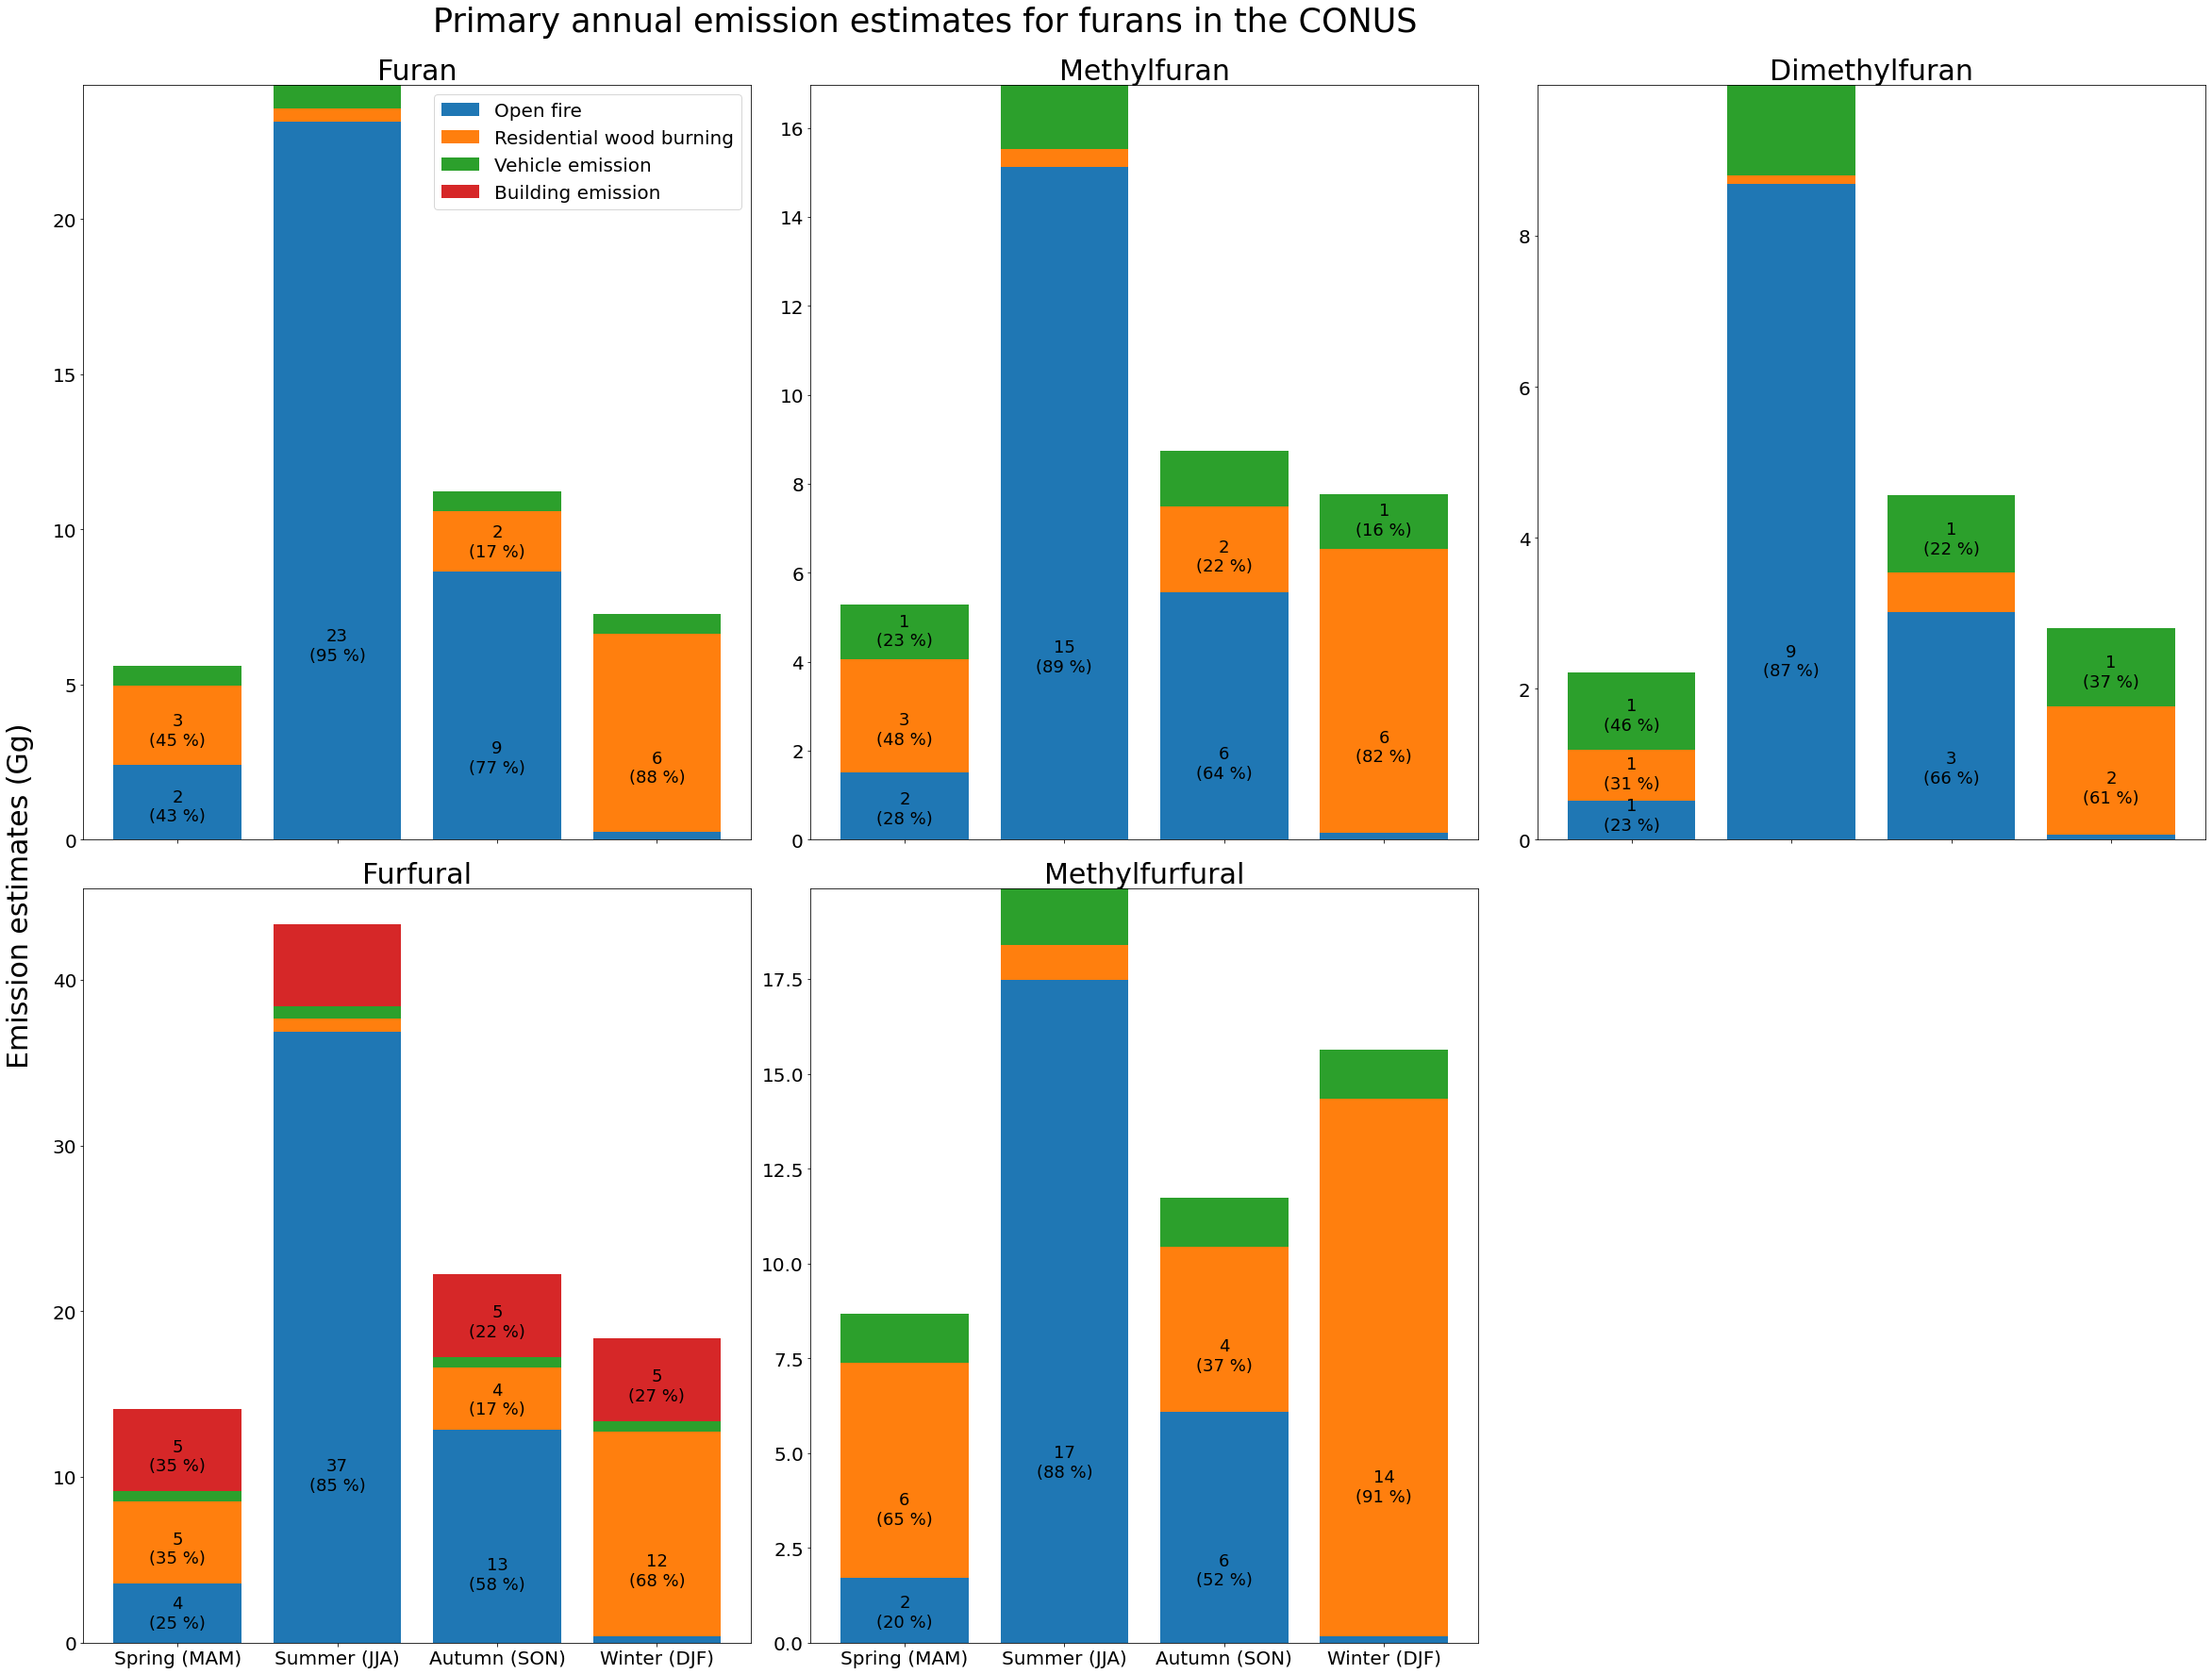

In [9]:
# initialize data of lists.
compounds    = ['Furan', 'Methylfuran', 'Dimethylfuran', 'Furfural', 'Methylfurfural']
sources      = ['Open fire', 'Residential wood burning', 'Vehicle emission', 'Building emission']

compound_of  = (Furan_of, Methylfuran_of, Dimethylfuran_of, Furfural_of, Methylfurfural_of)
compound_rwc = (Furan_rwc, Methylfuran_rwc, Dimethylfuran_rwc, Furfural_rwc, Methylfurfural_rwc)
compound_on  = (Furan_on, Methylfuran_on, Dimethylfuran_on, Furfural_on, Methylfurfural_on)
compound_bd  = (Furan_bd, Methylfuran_bd, Dimethylfuran_bd, Furfural_bd, Methylfurfural_bd)

# plotting
fontsize_title = 35
fontsize_label = 30
fontsize_legend = 20
fontsize_tick = 20
fontsize_subtitle = 30
fotnsize_insert_text = 18
error_bar_capsize = 6
n_cols, n_rows = 3, 2
linewidth = 3


# Setup figure
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(32, 24), sharex = True)

# loop for each furan
for ind_comp, ax in zip(range(len(compounds)), axes.flatten()):
    # preparing the data
    data = {'Open fire': compound_of[ind_comp],
            'Residential wood burning': compound_rwc[ind_comp],
            'Vehicle emission': compound_on[ind_comp], 
            'Building emission': compound_bd[ind_comp]}

    df = pd.DataFrame(data, index = x_name)

    # mapping colors
    src2color = {"Open fire": "C0",
                 "Residential wood burning": "C1",
                 "Vehicle emission": "C2",
                 "Building emission": "C3"}

    # Add bars
    ax.bar(df.index, df["Open fire"], label="Open fire", color = src2color["Open fire"])
    ax.bar(df.index, df["Residential wood burning"], bottom=df["Open fire"], label="Residential wood burning", color = src2color["Residential wood burning"])
    ax.bar(df.index, df["Vehicle emission"], bottom=df["Open fire"] + df["Residential wood burning"], label="Vehicle emission", color = src2color["Vehicle emission"])
    ax.bar(df.index, df["Building emission"], bottom=df["Open fire"] + df["Residential wood burning"] + df["Vehicle emission"], label="Building emission", color = src2color["Building emission"])

    # Add text for Gg and percentage
    for ind in df.index: # running through each season
        start = 0
        for col in df.columns:
            value, pct = df.loc[ind, col], round(100 * df.loc[ind, col] / df.loc[ind, :].sum(), 1)
            #ytext = f'{np.round(value,2)}\n({pct} %)'
            ytext = '{:.0f}\n({:.0f} %)'.format(value, pct)

            # only show the text when the contribution is more than 10%
            if pct > 15:
                ax.text(x = ind, y = start+value/4, 
                        s = ytext,
                        fontsize = fotnsize_insert_text,
                        ha='center',
                        color='black')
            start += value
    
    # legend size
    if ind_comp == 0: ax.legend(fontsize=fontsize_legend)
    
    # title
    ax.set_title(compounds[ind_comp], fontsize=fontsize_subtitle)
    # x and y tick
    ax.tick_params(axis='both', labelsize=fontsize_tick)

# delete the last subplot
axes[1][2].set_visible(False)

# texts for x/y axis and title
fig.text(-0.01,0.48, "Emission estimates (Gg)", ha="center", va="center", rotation=90, fontsize=fontsize_label)
fig.text(0.18,1.01, "Primary annual emission estimates for furans in the CONUS", fontsize=fontsize_title)

plt.tight_layout()

plt.show()

##